['ham' 'ham' 'ham' ..., 'ham' 'ham' 'ham']
['spam' 'ham']
[[1222   28]
 [   5  138]]


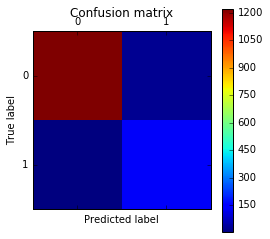

Accuracy:
0.976310122039


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

df = pd.read_csv('./data/LinearClassification/SMSSpamCollection', delimiter='\t', header=None)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])
 
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
 
X_test = vectorizer.transform(X_test_raw)
y_test_result = classifier.predict(X_test)
print(y_test_result)

test = vectorizer.transform( ['URGENT! Your Mobile No 1234 was awarded a Prize', 'Hey honey, whats up?'] )
predictions = classifier.predict(test)
print(predictions)

confusion_matrix = confusion_matrix(y_test_result, y_test)
print(confusion_matrix)


plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print ('Accuracy:')
print(accuracy_score(y_test_result, y_test))